In [29]:
from stitch_ite import *
import imageio

# Set file path

In [2]:
path_left = 'Data\Left' # folder of the frist CT volumn
path_mid = 'Data\Mid'# folder of the second CT volumn
path_right = 'Data\Right'

In [43]:
save_path = r'Data\Stitch\s280'

# Set the rotation angle to straighten the dataset

In [3]:
angle = 0.7

# Sitch left + middle

### 1. Read data of the first two CT volumn

In [4]:
data_left, data_right = prepare_data(path_left, path_mid)

D:\Project\LINX\Velux\stitch_ite.py:36: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  if np.rank(left) == 3: # if it is a volumn


left image has size: (995, 737, 76)
right image has size: (995, 977, 76)


### 2. find the corresponding CT frame of the two volumn and the registration model

In [5]:
model_robust, left_index, right_index = find_most_likely_index_auto(data_left, data_right)

c:\program files\python36\lib\site-packages\skimage\measure\fit.py:831: RuntimeWarning: invalid value encountered in less
  sample_model_inliers = sample_model_residuals < residual_threshold


similarity in the overlapping area: 0.5035986216905813
similarity in the overlapping area: 0.7379269951757575
similarity in the overlapping area: 0.5702313030039377
similarity in the overlapping area: 0.7236832276394716
similarity in the overlapping area: 0.48984450519159906
similarity in the overlapping area: 0.8353124881231059
similarity in the overlapping area: 0.7677118584098201
similarity in the overlapping area: 0.9190248369437143
similarity in the overlapping area: 0.8804671814276044
similarity in the overlapping area: 0.5798142066134416
similarity in the overlapping area: 0.6516236178736055
similarity in the overlapping area: 0.5625592788983236
similarity in the overlapping area: 0.8616778866598599
similarity in the overlapping area: 0.47309500242000574
similarity in the overlapping area: 0.24871724338294168
similarity in the overlapping area: 0.8406241089636235
similarity in the overlapping area: 0.8259707615127294
similarity in the overlapping area: 0.48644121628421866
simila

### 3. visualize the stitching result of one CT frame

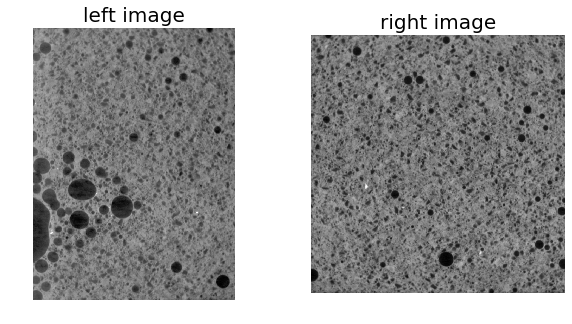

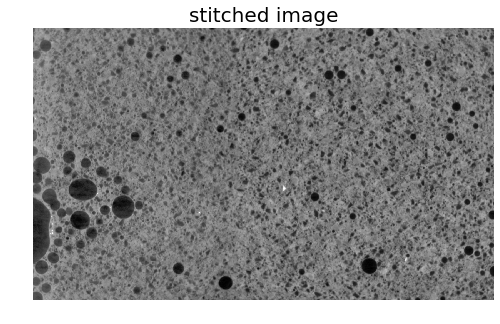

In [6]:
image_merge = merge_full_image(data_left, data_right, left_index, right_index, model_robust, verbose = 1, hist_match = 1)

### 4. Merge the whole volumn

In [7]:
vol_merge = merge_vol(left_index, right_index, data_left, data_right, model_robust, image_merge)

(995, 737, 76)
(995, 977, 76)
(995, 737, 76)
(995, 977, 70)
stitched volumn has shape: (999, 1659, 70)


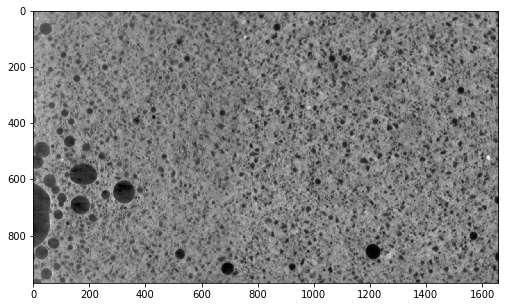

In [8]:
plt.figure(figsize = (20,5))
plt.imshow(vol_merge[10:-20,:,33], cmap = 'gray')

# Stitch the new volumn with the right volumn 

### 1. Prepare data: use the stitched volumn (vol_merge) as left data

In [9]:
data_left, data_right = prepare_data(vol_merge, path_right)

D:\Project\LINX\Velux\stitch_ite.py:36: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  if np.rank(left) == 3: # if it is a volumn


left image has size: (985, 1659, 70)
right image has size: (985, 972, 76)


### 2. Find the corresponding frame, reigistration model and show result of one frame

similarity in the overlapping area: 0.5722699212763981
similarity in the overlapping area: 0.7277631713549524
similarity in the overlapping area: 0.6519919899908282
similarity in the overlapping area: 0.9208033902227309
similarity in the overlapping area: 0.4380323078830487
similarity in the overlapping area: 0.914124530069933
similarity in the overlapping area: 0.6896759175641966
similarity in the overlapping area: 0.6015027833744401
similarity in the overlapping area: 0.7490851241312172
similarity in the overlapping area: 0.6896715092840758
similarity in the overlapping area: 0.80998417222292
similarity in the overlapping area: 0.786882079280919
similarity in the overlapping area: 0.7904962960206632
similarity in the overlapping area: 0.6149614511807414
similarity in the overlapping area: 0.5022000100750548
similarity in the overlapping area: 0.9281529570803142
similarity in the overlapping area: 0.621800476493355
similarity in the overlapping area: 0.648829273046959
similarity in th

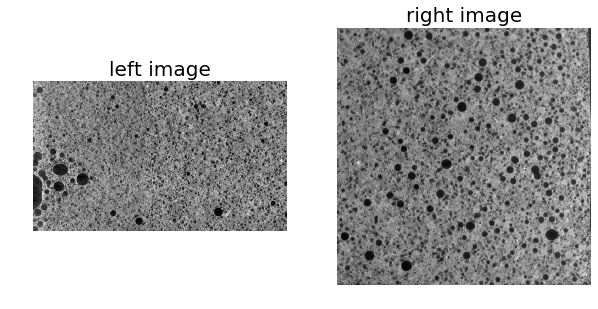

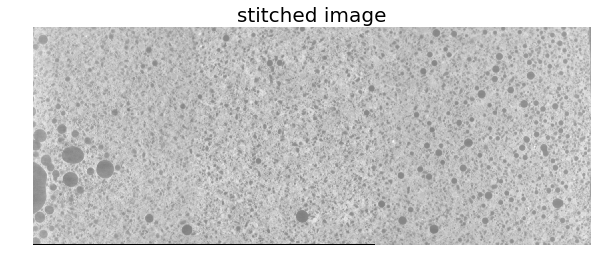

In [10]:
model_robust, left_index, right_index = find_most_likely_index_auto(data_left, data_right)
image_merge = merge_full_image(data_left, data_right, left_index, right_index, model_robust, verbose = 1, hist_match = 1)

### 3. Stitch the whole volumn

In [11]:
vol_merge = merge_vol(left_index, right_index, data_left, data_right, model_robust, image_merge)

(985, 1659, 70)
(985, 972, 76)
(985, 1659, 70)
(985, 972, 63)
stitched volumn has shape: (998, 2510, 63)


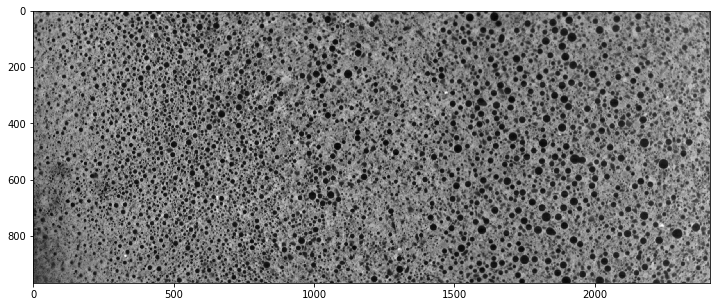

In [49]:
plt.figure(figsize = (20,5))
plt.imshow(vol_merge[10:-20,90:-10,10], cmap = 'gray')

In [26]:
s = np.shape(vol_merge)

In [27]:
s[2]

63

In [50]:
i0 = 0
for i in range(10,s[2]-9):
    imageio.imwrite(save_path+'\\'+ str(i0)+'.jpg', (vol_merge[10:-20,90:-10,i]))
    i0 = i0+1


Lossy conversion from float64 to uint8. Range [-0.9607843137254902, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.9725490196078431, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.9647058823529412, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.9764705882352941, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.9843137254901961, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.9843137254901961, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.9882352941176471, 0.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float